Please note that this notebook is intended to be run in Google Colab rather than as a Jupyter notebook on your local machine. Please click the "Open in Colab" button.

# Setup

In [11]:
import chemprop
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA

In [12]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('data/250k_rndm_zinc_drugs_clean_3.csv')

# Retain only the 'smiles' and 'qed' columns
df = df[['smiles', 'qed']]

# Save the modified DataFrame back to a new CSV file
df.to_csv('data/250k_rndm_zinc_drugs_clean_3_qed.csv', index=False)


In [5]:
def plot_parity(y_true, y_pred, y_pred_unc=None):

    axmin = min(min(y_true), min(y_pred)) - 0.1*(max(y_true)-min(y_true))
    axmax = max(max(y_true), max(y_pred)) + 0.1*(max(y_true)-min(y_true))

    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)

    plt.plot([axmin, axmax], [axmin, axmax], '--k')

    plt.errorbar(y_true, y_pred, yerr=y_pred_unc, linewidth=0, marker='o', markeredgecolor='w', alpha=1, elinewidth=1)

    plt.xlim((axmin, axmax))
    plt.ylim((axmin, axmax))

    ax = plt.gca()
    ax.set_aspect('equal')

    at = AnchoredText(
    f"MAE = {mae:.2f}\nRMSE = {rmse:.2f}", prop=dict(size=10), frameon=True, loc='upper left')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax.add_artist(at)

    plt.xlabel('True')
    plt.ylabel('Chemprop Predicted')

    plt.show()

    return

# Train regression model

In [13]:
arguments = [
    '--data_path', 'data/250k_rndm_zinc_drugs_clean_3_qed.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'chemprop_data',
    '--epochs', '5',
    '--extra_metrics', 'r2', 'mae',
    '--save_smiles_splits'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python /data/yulai/anaconda3/envs/torchdrug/lib/python3.9/site-packages/ipykernel_launcher.py --f=/data/yulai/.local/share/jupyter/runtime/kernel-v2-1374168ylQo6Eh3zXiY.json
Args
{'activation': 'ReLU',
 'adding_bond_types': True,
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_constraints': [],
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'atom_targets': [],
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_constraints': [],
 'bond_descriptor_scaling': True,
 'bond_descriptors': None,
 'bond_descriptors_path': None,
 'bond_descriptors_size': 0,
 'bond_features_size': 0,
 'bond_targets': [],
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'constraints_path': None,
 'crossval_in

# Predict from file

In [14]:
arguments = [
    '--test_path', 'data/250k_rndm_zinc_drugs_clean_3_qed.csv',
    '--preds_path', 'chemprop_data/qed_preds.csv',
    '--checkpoint_path', 'chemprop_data/fold_0/model_0/model.pt'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


249455it [00:01, 145365.21it/s]
100%|██████████| 249455/249455 [00:02<00:00, 97861.47it/s] 


Validating SMILES
Test size = 249,455


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Moving model to cuda


100%|██████████| 1/1 [04:08<00:00, 248.83s/it]


Saving predictions to chemprop_data/qed_preds.csv
Elapsed time = 0:04:16


(array([4.0000e+00, 6.0000e+00, 2.0000e+01, 2.8000e+01, 5.6000e+01,
        6.6000e+01, 9.1000e+01, 1.2600e+02, 1.9200e+02, 2.6800e+02,
        3.5000e+02, 5.1300e+02, 5.6700e+02, 7.9800e+02, 1.0080e+03,
        1.1570e+03, 1.3400e+03, 1.4490e+03, 1.6760e+03, 1.9470e+03,
        2.3890e+03, 2.8080e+03, 3.0400e+03, 3.2220e+03, 3.2920e+03,
        3.4130e+03, 3.8060e+03, 4.5180e+03, 5.2130e+03, 5.8450e+03,
        6.7010e+03, 6.8970e+03, 7.2690e+03, 8.1110e+03, 8.1910e+03,
        8.7300e+03, 1.0015e+04, 1.0710e+04, 1.1850e+04, 1.2812e+04,
        1.4134e+04, 1.4004e+04, 1.4027e+04, 1.5233e+04, 1.3979e+04,
        1.2294e+04, 9.8210e+03, 8.1640e+03, 5.2070e+03, 2.0980e+03]),
 array([0.11181148, 0.12853289, 0.14525431, 0.16197573, 0.17869715,
        0.19541856, 0.21213998, 0.2288614 , 0.24558282, 0.26230423,
        0.27902565, 0.29574707, 0.31246849, 0.3291899 , 0.34591132,
        0.36263274, 0.37935416, 0.39607558, 0.41279699, 0.42951841,
        0.44623983, 0.46296125, 0.47968266, 0.

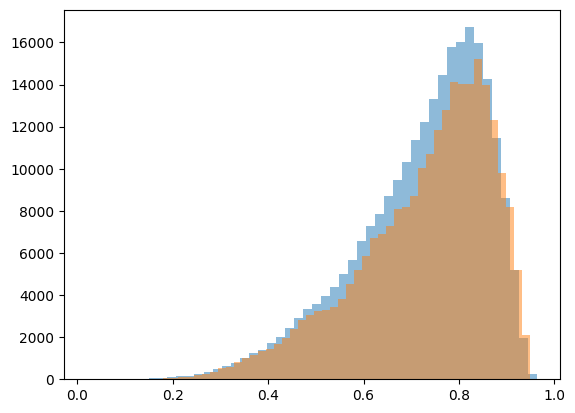

In [16]:
df = pd.read_csv('data/250k_rndm_zinc_drugs_clean_3_qed.csv')
df['preds'] = [x[0] for x in preds]

plt.hist(df['preds'], bins=50, alpha=	0.5, label="predict")
plt.hist(df['qed'], bins=50, alpha=0.5, label="target")

/data/yulai/anaconda3/envs/torchdrug/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


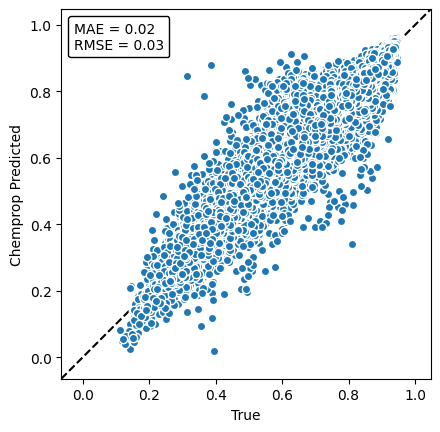

In [17]:
plot_parity(df.qed, df.preds)

# Fingerprint

In [ ]:
arguments = [
    '--test_path', 'data/regression.csv',
    '--preds_path', 'test_preds_fingerprint.csv',
    '--checkpoint_dir', 'test_checkpoints_reg',
    '--fingerprint_type', 'MPN'
]

args = chemprop.args.FingerprintArgs().parse_args(arguments)
preds = chemprop.train.molecule_fingerprint.molecule_fingerprint(args=args)

Loading training args
Setting molecule featurization parameters to default.
Loading data


500it [00:00, 110884.15it/s]
100%|██████████| 500/500 [00:00<00:00, 70909.62it/s]
/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Validating SMILES
Test size = 500
Encoding smiles into a fingerprint vector from 1 models.


  0%|          | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".



100%|██████████| 1/1 [00:00<00:00,  1.07it/s]


Saving predictions to test_preds_fingerprint.csv
Elapsed time = 0:00:01
